In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

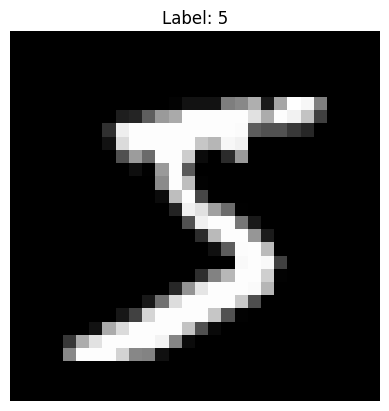

In [10]:
# one example image from the dataset
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [11]:
# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

In [12]:
# Reshape to add a single channel for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [13]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [14]:
# Split validation data from training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train_cat, y_val_cat, y_train, y_val = train_test_split(
    X_train, y_train_cat, y_train, test_size=0.1, random_state=42
)

In [15]:
# Build 2D CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
#to calculate the convergence time
import time

# Start the timer
start_time = time.time()

# Train the model
history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=2, batch_size=32, verbose=1)

# End the timer
end_time = time.time()

# Calculate total training time
training_time = end_time - start_time
print(f"Time taken for convergence: {training_time:.2f} seconds")

Epoch 1/2
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - accuracy: 0.8584 - loss: 0.4385 - val_accuracy: 0.9862 - val_loss: 0.0503
Epoch 2/2
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9757 - loss: 0.0852 - val_accuracy: 0.9888 - val_loss: 0.0395
Time taken for convergence: 166.13 seconds


In [19]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9875 - loss: 0.0372


In [20]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [22]:
y_pred_prob[0]

array([2.4501601e-10, 7.0971771e-09, 1.7030725e-07, 4.7447045e-07,
       9.1721708e-10, 6.8577839e-12, 3.9637437e-13, 9.9999636e-01,
       8.2783140e-09, 3.0092685e-06], dtype=float32)

In [23]:
y_pred[0]

np.int64(7)

In [25]:
y_test[0]

np.uint8(7)

In [26]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report (accuracy, precision, recall, f1-score)
report = classification_report(y_test, y_pred, output_dict=True)

In [28]:
conf_matrix

array([[ 976,    0,    0,    0,    0,    0,    1,    1,    2,    0],
       [   0, 1129,    1,    2,    0,    0,    2,    1,    0,    0],
       [   1,    0, 1028,    0,    0,    0,    0,    2,    1,    0],
       [   1,    0,    2, 1000,    0,    3,    0,    2,    2,    0],
       [   0,    0,    0,    0,  971,    0,    0,    0,    3,    8],
       [   2,    0,    1,    5,    0,  878,    3,    2,    1,    0],
       [   3,    2,    0,    0,    1,    1,  949,    0,    2,    0],
       [   0,    1,    7,    2,    0,    0,    0, 1015,    0,    3],
       [   3,    0,    3,    1,    0,    0,    0,    2,  963,    2],
       [   2,    3,    0,    0,    3,    3,    1,    5,    4,  988]])

In [27]:
report

{'0': {'precision': 0.9878542510121457,
  'recall': 0.9959183673469387,
  'f1-score': 0.991869918699187,
  'support': 980.0},
 '1': {'precision': 0.9947136563876652,
  'recall': 0.9947136563876652,
  'f1-score': 0.9947136563876652,
  'support': 1135.0},
 '2': {'precision': 0.9865642994241842,
  'recall': 0.9961240310077519,
  'f1-score': 0.991321118611379,
  'support': 1032.0},
 '3': {'precision': 0.9900990099009901,
  'recall': 0.9900990099009901,
  'f1-score': 0.9900990099009901,
  'support': 1010.0},
 '4': {'precision': 0.9958974358974358,
  'recall': 0.9887983706720977,
  'f1-score': 0.9923352069494124,
  'support': 982.0},
 '5': {'precision': 0.992090395480226,
  'recall': 0.984304932735426,
  'f1-score': 0.988182329769274,
  'support': 892.0},
 '6': {'precision': 0.9926778242677824,
  'recall': 0.9906054279749478,
  'f1-score': 0.9916405433646813,
  'support': 958.0},
 '7': {'precision': 0.9854368932038835,
  'recall': 0.9873540856031129,
  'f1-score': 0.9863945578231292,
  'supp

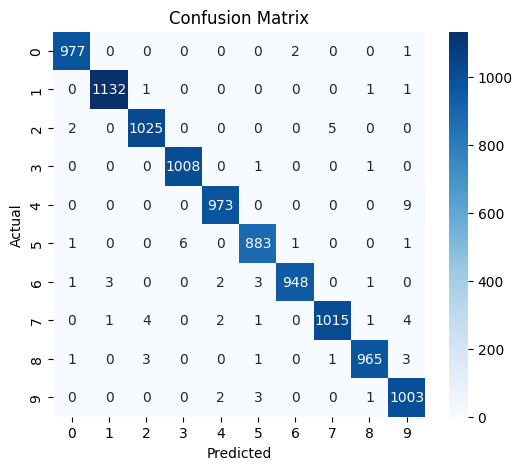

In [35]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# Print performance metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {report['weighted avg']['precision']:.4f}")
print(f"Recall: {report['weighted avg']['recall']:.4f}")
print(f"F1-score: {report['weighted avg']['f1-score']:.4f}")

Test Accuracy: 0.9929
Precision: 0.9929
Recall: 0.9929
F1-score: 0.9929


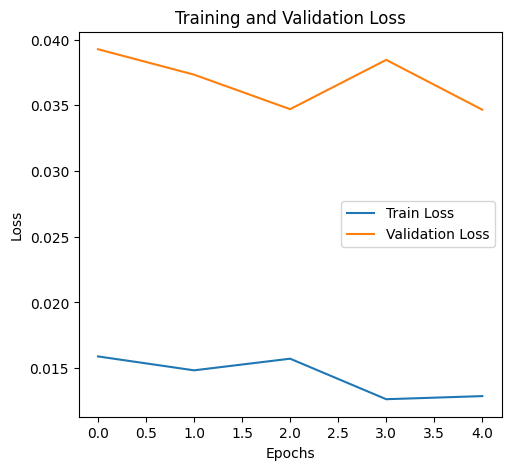

In [38]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

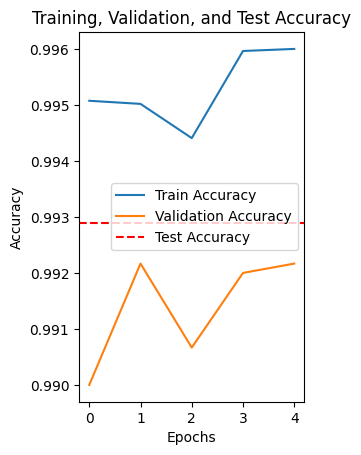

In [44]:
# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training, Validation, and Test Accuracy')

plt.show()

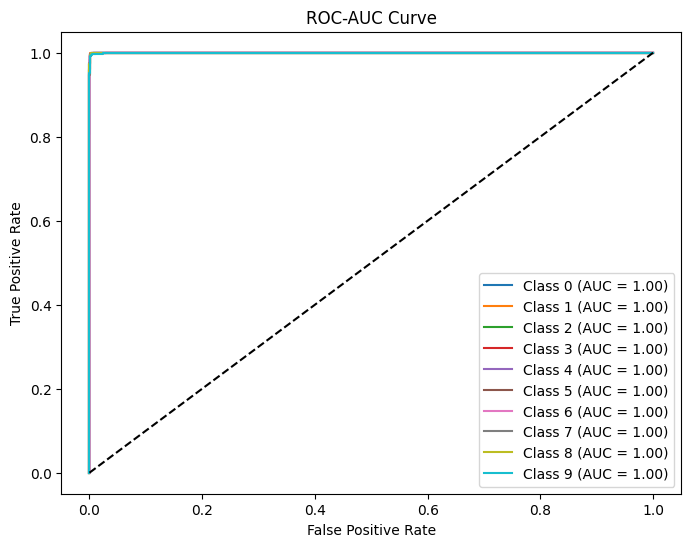

In [45]:
# ROC Curve for one-vs-rest classification
plt.figure(figsize=(8, 6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

In [29]:
from tensorflow.keras.datasets import cifar10

In [30]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [33]:
X_train.shape


(50000, 32, 32, 3)

In [34]:
X_test.shape

(10000, 32, 32, 3)

In [35]:
# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Split data into training and validation set
X_train, X_val, y_train_cat, y_val_cat, y_train, y_val = train_test_split(
    X_train, y_train_cat, y_train, test_size=0.1, random_state=42
)

In [36]:
# Build 2D CNN model for CIFAR-10
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=2, batch_size=64, verbose=1)

Epoch 1/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 108s 151ms/step - accuracy: 0.3272 - loss: 1.8153 - val_accuracy: 0.5634 - val_loss: 1.2109
Epoch 2/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 104s 147ms/step - accuracy: 0.5698 - loss: 1.2095 - val_accuracy: 0.6502 - val_loss: 0.9748


In [38]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6550 - loss: 0.9650


In [39]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


In [40]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report (accuracy, precision, recall, f1-score)
report = classification_report(y_test, y_pred, output_dict=True)

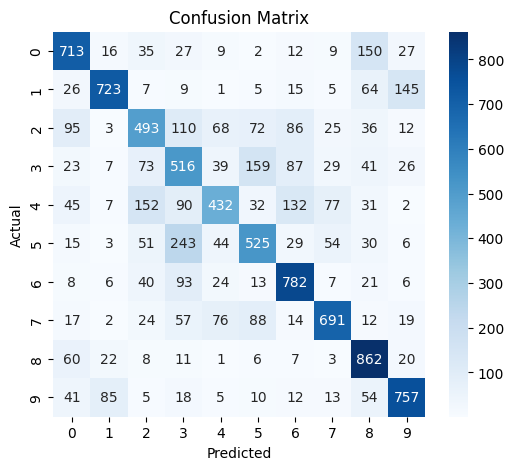

In [41]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Print performance metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {report['weighted avg']['precision']:.4f}")
print(f"Recall: {report['weighted avg']['recall']:.4f}")
print(f"F1-score: {report['weighted avg']['f1-score']:.4f}")


Test Accuracy: 0.6494
Precision: 0.6526
Recall: 0.6494
F1-score: 0.6464


Text(0.5, 1.0, 'Training, Validation, and Test Loss')

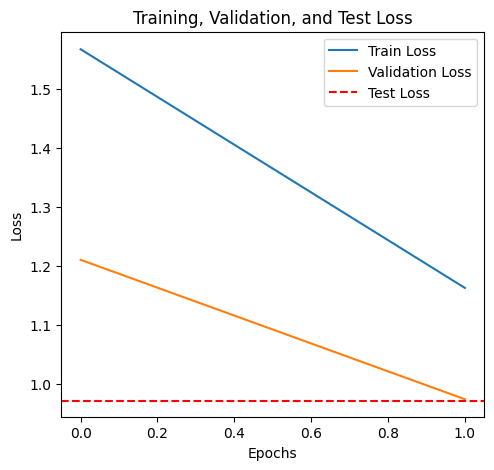

In [43]:
# Plot training, validation, and test loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training, Validation, and Test Loss')

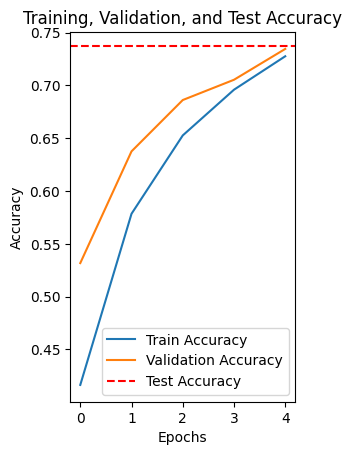

In [61]:
# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training, Validation, and Test Accuracy')
plt.show()

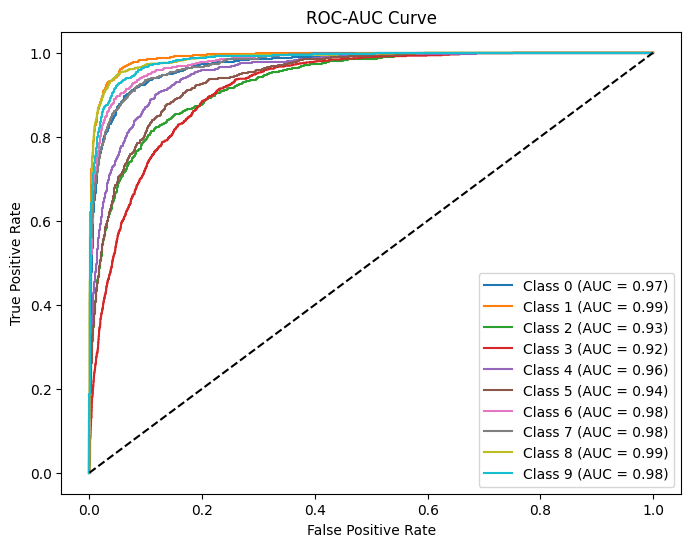

In [62]:
# ROC Curve for one-vs-rest classification
plt.figure(figsize=(8, 6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

In [ ]:
#using a pretrained model (ResNet)

In [44]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [45]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [46]:
# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

In [47]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [48]:
# Split validation data from training data
X_train, X_val, y_train_cat, y_val_cat, y_train, y_val = train_test_split(
    X_train, y_train_cat, y_train, test_size=0.1, random_state=42
)

In [49]:
# Load pre-trained ResNet50 (without top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [50]:
# Freeze base model layers
base_model.trainable = False

In [38]:
# Custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(10, activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=output_layer)

In [54]:
# Custom CNN head
x = base_model.output
x = Conv2D(128, (1,1), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(10, activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=output_layer)

In [55]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
# Train the model
history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=2, batch_size=32, verbose=1)

Epoch 1/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 251s 171ms/step - accuracy: 0.1268 - loss: 2.2777 - val_accuracy: 0.1602 - val_loss: 2.1093
Epoch 2/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 244s 158ms/step - accuracy: 0.1655 - loss: 2.1187 - val_accuracy: 0.1786 - val_loss: 2.0811


In [57]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 143ms/step - accuracy: 0.1725 - loss: 2.0711


In [58]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 151ms/step


In [59]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report (accuracy, precision, recall, f1-score)
report = classification_report(y_test, y_pred, output_dict=True)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


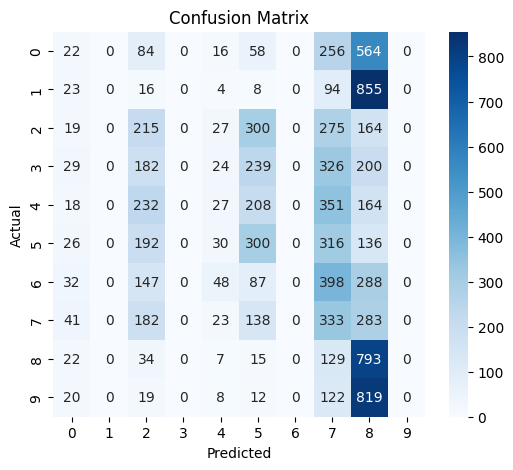

In [60]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [61]:
# Print performance metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {report['weighted avg']['precision']:.4f}")
print(f"Recall: {report['weighted avg']['recall']:.4f}")
print(f"F1-score: {report['weighted avg']['f1-score']:.4f}")

Test Accuracy: 0.1690
Precision: 0.0912
Recall: 0.1690
F1-score: 0.1006


Text(0.5, 1.0, 'Training & Validation Loss')

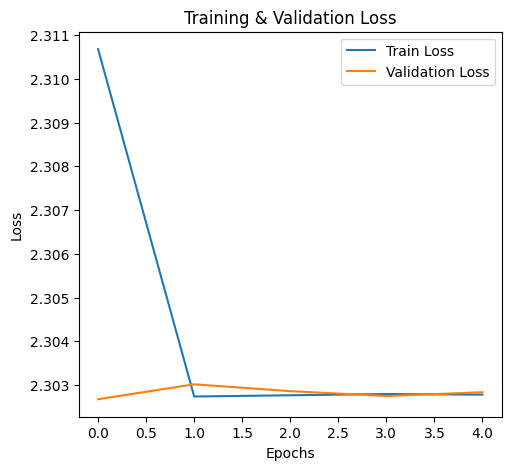

In [45]:
# Plot training & validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')


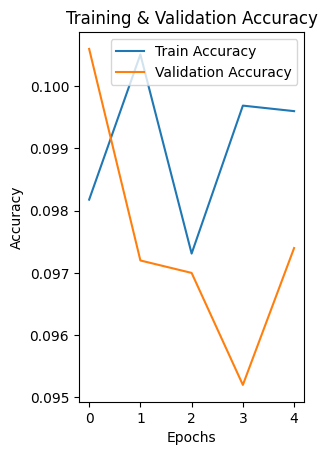

In [46]:

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.show()

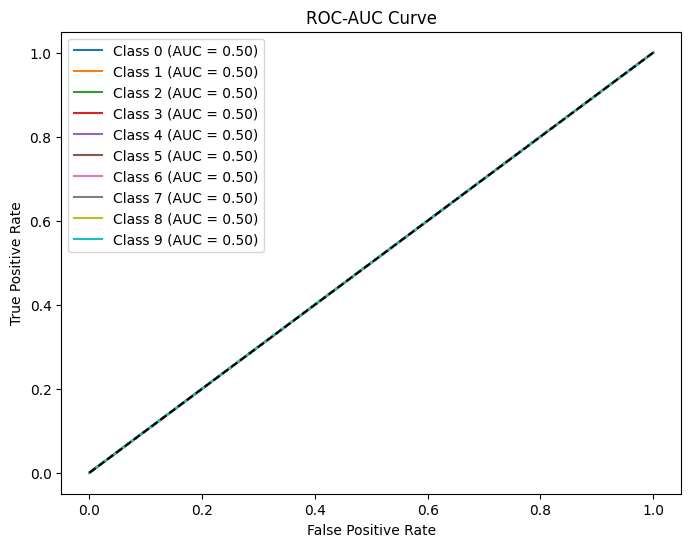

In [48]:
# ROC Curve for one-vs-rest classification
plt.figure(figsize=(8, 6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()